In [1]:
import numpy as no
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import random 
import os
%matplotlib inline
import plotly.express as px
from statsmodels.stats import descriptivestats
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df= pd.read_csv(r'D:\Internship from CipherByte\Iris Flower - Iris.csv', encoding= 'latin1')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

As the Species are in Categorical , we change it to numerical

In [9]:
le= LabelEncoder()

In [10]:
df['Species']= le.fit_transform(df['Species'])

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
sp=df['Species'].value_counts()
print({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'},'\n',sp)

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'} 
 Species
0    50
1    50
2    50
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

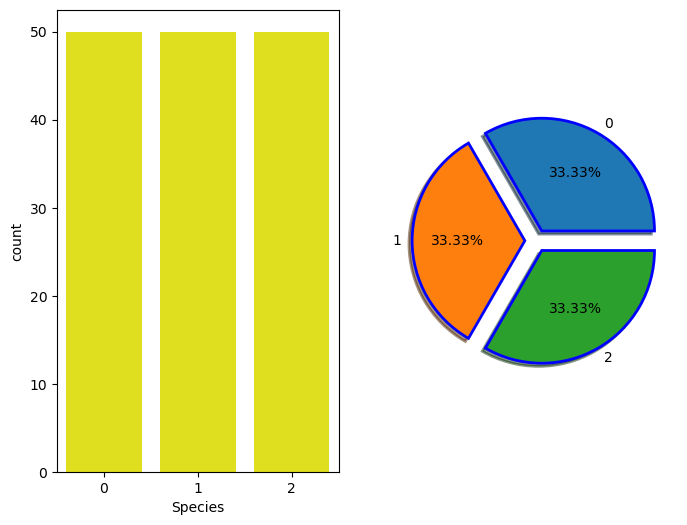

In [13]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(x='Species',color='yellow', data=df)

plt.subplot(1,2,2)
wp= {'linewidth':2,'edgecolor':'blue'}
explode = (0.1,0.1,0.1)
plt.pie(df['Species'].value_counts(),labels = sp.index,autopct='%.2f%%',shadow=True,startangle=0,wedgeprops=wp,explode=explode)
plt.show

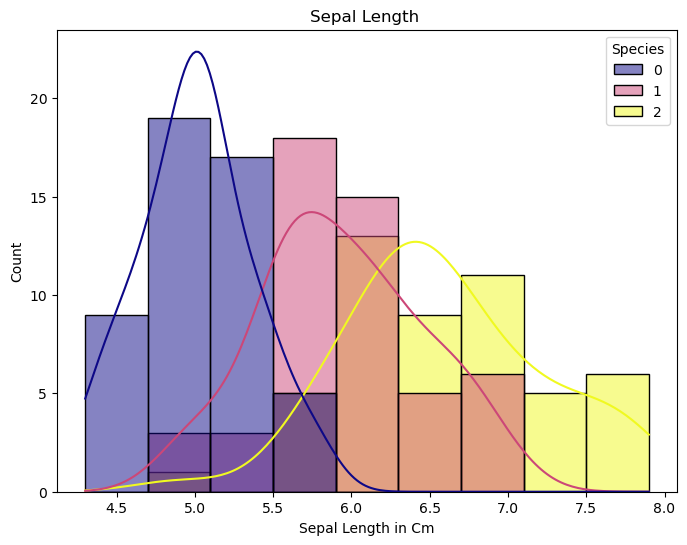

In [14]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x="SepalLengthCm", hue=df.Species, kde = True, palette='plasma')
plt.title("Sepal Length ")
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Count')

plt.show()

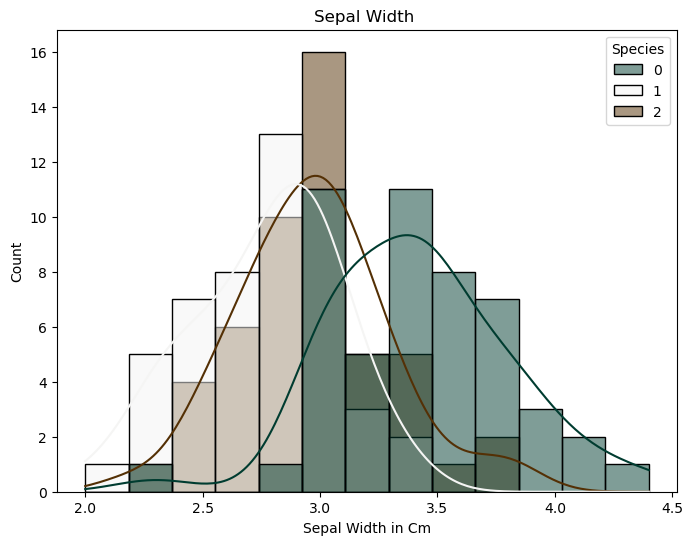

In [15]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x="SepalWidthCm", hue=df.Species, kde = True, palette='BrBG_r')
plt.title("Sepal Width ")
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Count')

plt.show()

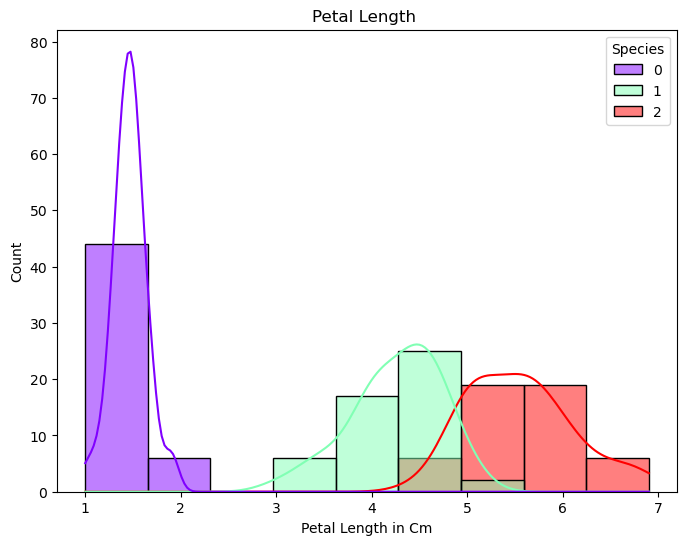

In [16]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x="PetalLengthCm", hue=df.Species, kde = True, palette='rainbow')
plt.title("Petal Length ")
plt.xlabel('Petal Length in Cm')
plt.ylabel('Count')

plt.show()

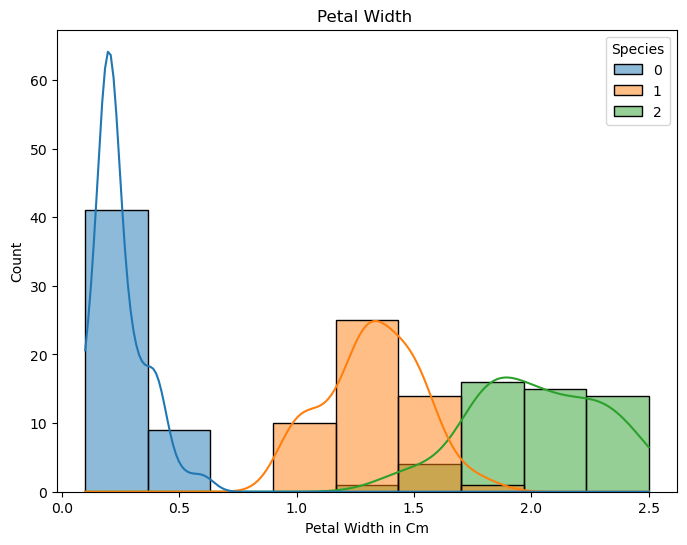

In [17]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x="PetalWidthCm", hue=df.Species, kde = True, palette='tab10')
plt.title("Petal Width ")
plt.xlabel('Petal Width in Cm')
plt.ylabel('Count')

plt.show()

In [18]:
species=[0,1,2]
color= ['red','green','blue']

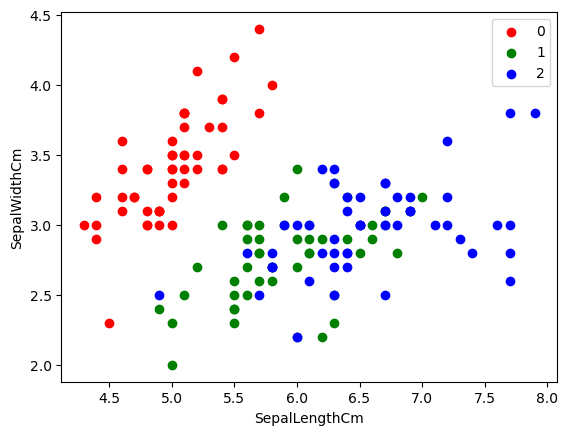

In [19]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

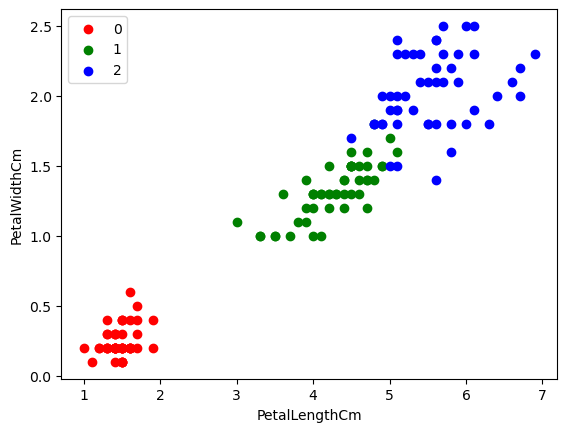

In [20]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],color=color[i],label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

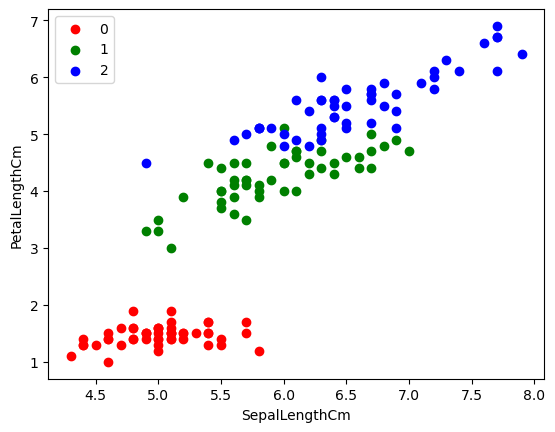

In [21]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],color=color[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

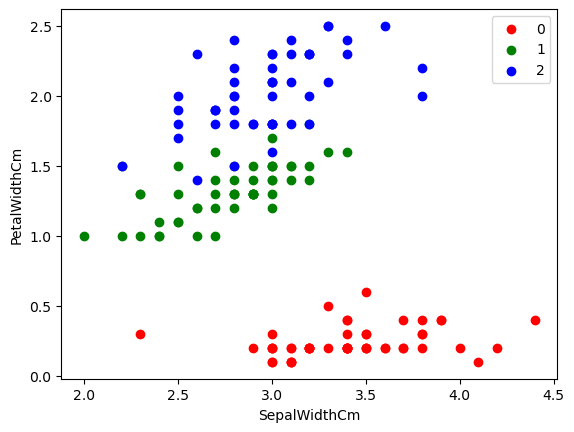

In [22]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],color=color[i],label=species[i])
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

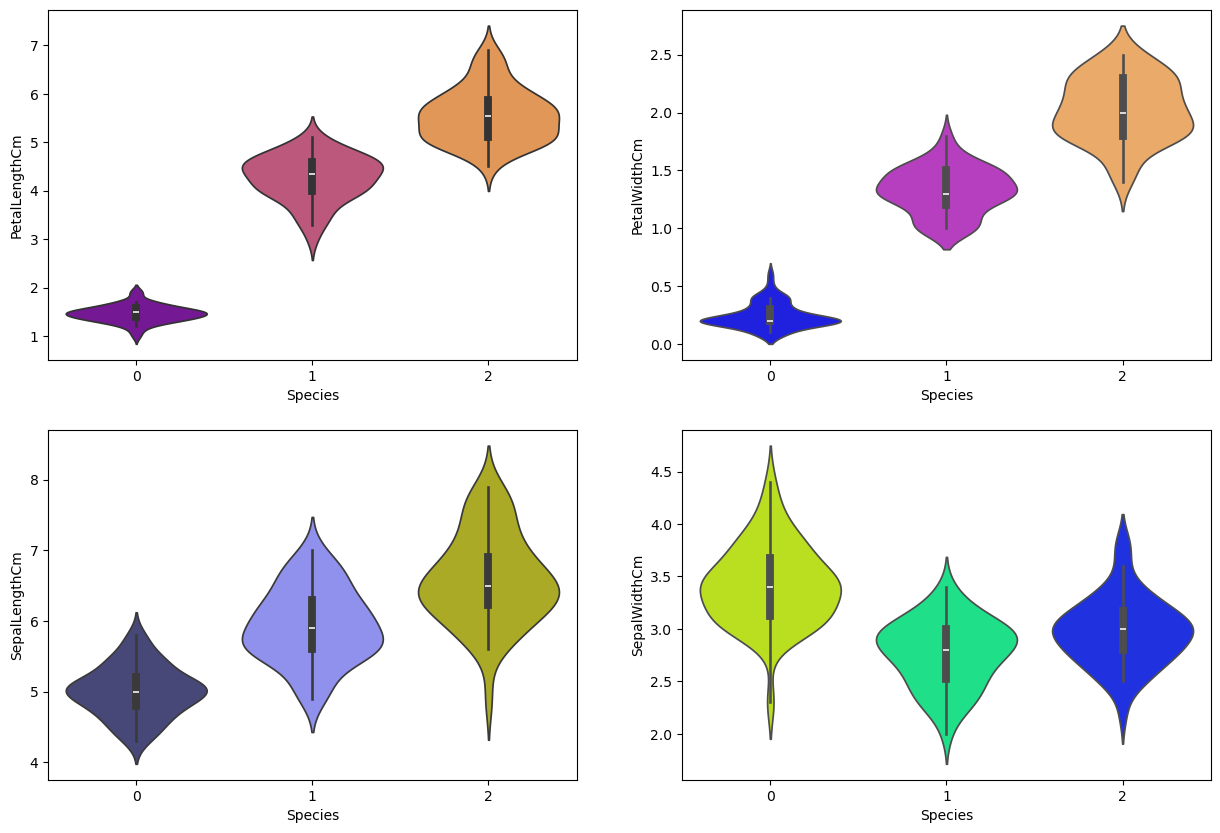

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',palette='plasma', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',palette ='gnuplot2',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',palette ='gist_stern', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',palette = 'gist_rainbow',data=df)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [25]:
cor = df.corr().round(2)
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.00,-0.11,0.87,0.82,0.78
SepalWidthCm,-0.11,1.00,-0.42,-0.36,-0.42
PetalLengthCm,0.87,-0.42,1.00,0.96,0.95
PetalWidthCm,0.82,-0.36,0.96,1.00,0.96
Species,0.78,-0.42,0.95,0.96,1.00


<Axes: >

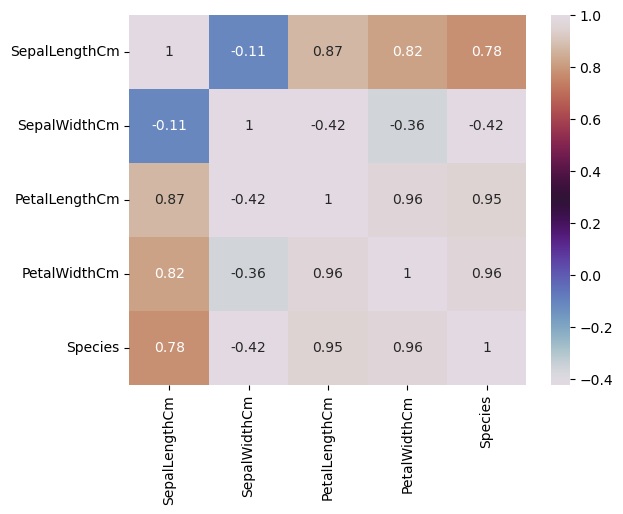

In [26]:
sns.heatmap(cor,annot=True,cmap='twilight')

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats import descriptivestats
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,r2_score,accuracy_score,classification_report,recall_score,f1_score,precision_recall_curve,precision_score

In [28]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

#scale features using Min-Max scaler
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

### Divided into X & Y

Target variable "Species"

In [29]:
x= df.drop(columns=['Species'],axis=1)
y= df['Species']

In [30]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


### Model Building
Train-Test Split

25% test data - xtest , ytest - actual target variable

75% train data - xtrain,ytrain

xtrain - i/p features for train data

ytrain - target variable for train data

xtest -i/p features for test data

ytest is actual target variable for test data3

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(112, 4)
xtest shape(38, 4)
ytrain shape(112,)
ytest shape(38,)


In [33]:
def helper(model,xtrain,ytrain,xtest,ytest):
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)

    train_acc = accuracy_score(train_pred,ytrain)
    test_acc = accuracy_score(test_pred,ytest)
    prec = precision_score(ytest,test_pred,pos_label='positive',average='weighted')
    f1 = f1_score(ytest,test_pred,pos_label='positive',average='weighted')
    recc = recall_score(ytest,test_pred,pos_label='positive',average='weighted')
    acc_mat= {'Train accuracy':train_acc,"Test accuracy":test_acc,"Precision":prec,"F1 score":f1,"Recall":recc}
    
    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, ytrain))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, ytest))

    print('\n========================================================')

    
    return acc_mat
    

# Base Model

### Decision Tree Classifier

In [34]:
dtc= DecisionTreeClassifier()

In [35]:
%%time
dtc_tree = DecisionTreeClassifier(max_depth=3,max_features=4,criterion='gini')
dtc1 = dtc_tree.fit(xtrain,ytrain)

Acc_mat_dt= helper(dtc1,xtrain,ytrain,xtest,ytest)


Training Accuracy Score:  0.9553571428571429
Testing Accuracy Score:  1.0
Precision on test data:  1.0
Recall on test data:  1.0
F1 score on test data:  1.0

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.90      0.94        42
           2       0.89      0.97      0.93        35

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112


Classification Report on Test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


CPU ti

In [36]:
train_pred = dtc1.predict(xtrain)
test_pred = dtc1.predict(xtest)

In [37]:
dtc_as= accuracy_score(ytest,test_pred)
print("Accuracy Score:",dtc_as)

Accuracy Score: 1.0


## Random Forest Classifier

In [38]:
%%time
rfc_tree = RandomForestClassifier(oob_score=True, n_estimators=100, max_depth=10)
rfc1 = rfc_tree.fit(xtrain, ytrain)

Acc_mat_rf= helper(rfc1,xtrain, ytrain,xtest,ytest)


Training Accuracy Score:  1.0
Testing Accuracy Score:  1.0
Precision on test data:  1.0
Recall on test data:  1.0
F1 score on test data:  1.0

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        38

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112


Classification Report on Test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


CPU times: total: 234

In [39]:
train_pred = rfc1.predict(xtrain)
test_pred = rfc1.predict(xtest)

In [40]:
rfc_as= accuracy_score(ytest,test_pred)
print("Accuracy Score:",rfc_as)

Accuracy Score: 1.0


## AdaBoost Classifier

In [41]:
%%time
abc_tree = AdaBoostClassifier(n_estimators=200, random_state=42)
abc1 = abc_tree.fit(xtrain, ytrain)

Acc_mat_ab= helper(abc1,xtrain, ytrain,xtest,ytest)


Training Accuracy Score:  0.9464285714285714
Testing Accuracy Score:  1.0
Precision on test data:  1.0
Recall on test data:  1.0
F1 score on test data:  1.0

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.90      0.92        41
           2       0.89      0.94      0.92        36

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112


Classification Report on Test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


CPU ti

In [42]:
train_pred = abc1.predict(xtrain)
test_pred = abc1.predict(xtest)

In [43]:
abc_as= accuracy_score(ytest,test_pred)
print("Accuracy Score:",abc_as)

Accuracy Score: 1.0


## Logistic Regression

In [44]:
%%time
lgr= LogisticRegression()
lgr1 = lgr.fit(xtrain, ytrain)

Acc_mat_lgr= helper(lgr1,xtrain, ytrain,xtest,ytest)


Training Accuracy Score:  0.9107142857142857
Testing Accuracy Score:  0.9736842105263158
Precision on test data:  0.9757085020242916
Recall on test data:  0.9736842105263158
F1 score on test data:  0.9735839598997494

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.85      0.89      0.87        37
           2       0.89      0.85      0.87        40

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112


Classification Report on Test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
we

In [45]:
train_pred = lgr1.predict(xtrain)
test_pred = lgr1.predict(xtest)

In [46]:
lgr_as= accuracy_score(ytest,test_pred)
print("Accuracy Score:",lgr_as)

Accuracy Score: 0.9736842105263158


## Gradient Boosting Classifier

In [47]:
%%time
gbc= GradientBoostingClassifier(n_estimators=500,random_state=42)
gbc1 = gbc.fit(xtrain, ytrain)

Acc_mat_gbc= helper(gbc1,xtrain, ytrain,xtest,ytest)


Training Accuracy Score:  1.0
Testing Accuracy Score:  1.0
Precision on test data:  1.0
Recall on test data:  1.0
F1 score on test data:  1.0

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        38

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112


Classification Report on Test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


CPU times: total: 1.0

In [48]:
train_pred = gbc1.predict(xtrain)
test_pred = gbc1.predict(xtest)

In [49]:
gbc_as= accuracy_score(ytest,test_pred)
print("Accuracy Score:",gbc_as)

Accuracy Score: 1.0


## Ploting all Models

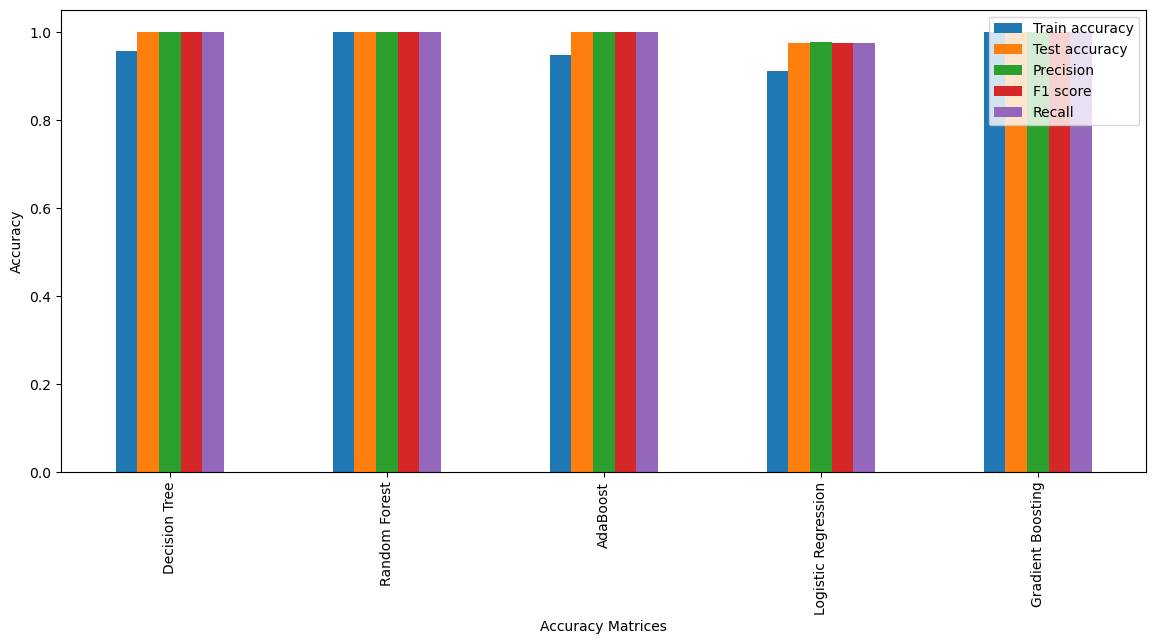

In [50]:
plot1= pd.DataFrame([Acc_mat_dt,Acc_mat_rf,Acc_mat_ab,Acc_mat_lgr,Acc_mat_gbc],index=['Decision Tree','Random Forest','AdaBoost','Logistic Regression','Gradient Boosting'])

plot1.plot(kind='bar',figsize=(14,6))
plt.xlabel('Accuracy Matrices')
plt.ylabel('Accuracy')
plt.show()

In [51]:
base_models=['Decision tree Classifier','Random Forest Classifier',
           'AdaBoost Classifier','Logistic Regression','Gradient Boosting Classifier' ]

accuracy_score=[dtc_as,rfc_as,abc_as,lgr_as,gbc_as]

base_models_conclusion = pd.DataFrame({'Models':base_models,"Accuracy":accuracy_score})

In [52]:
base_models_conclusion

,Models,Accuracy
0,Decision tree Classifier,1.000000
1,Random Forest Classifier,1.000000
2,AdaBoost Classifier,1.000000
3,Logistic Regression,0.973684
4,Gradient Boosting Classifier,1.000000


# Thank you